In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from BRNDTS import BRNDTS
from config import SOURCE, ADVERT
from utils.utils import load_image

%matplotlib inline

>> Processing a single image: source/advert.jpeg
>> Processing a single image: source/image.png
WARNING ⚠️ imgsz=[801, 1421] must be multiple of max stride 32, updating to [832, 1440]
WARNING ⚠️ imgsz=[801, 1421] must be multiple of max stride 32, updating to [832, 1440]

>> There are 6 possible locations and the ad was placed with the following arguments:               
  -> Mode: total               
  -> Down Scale: 95.00%               
  -> Bordered: True               
  -> Border Thickness: 0.03               
  -> Border Color: (0, 0, 0)               
  -> Color Correction: None               
  -> Smoothing: None               
  -> Perspective Warp: False               
  -> Save: True

>> Image saved in: /glasses_yolo/approach_test/image_with_advert.jpg



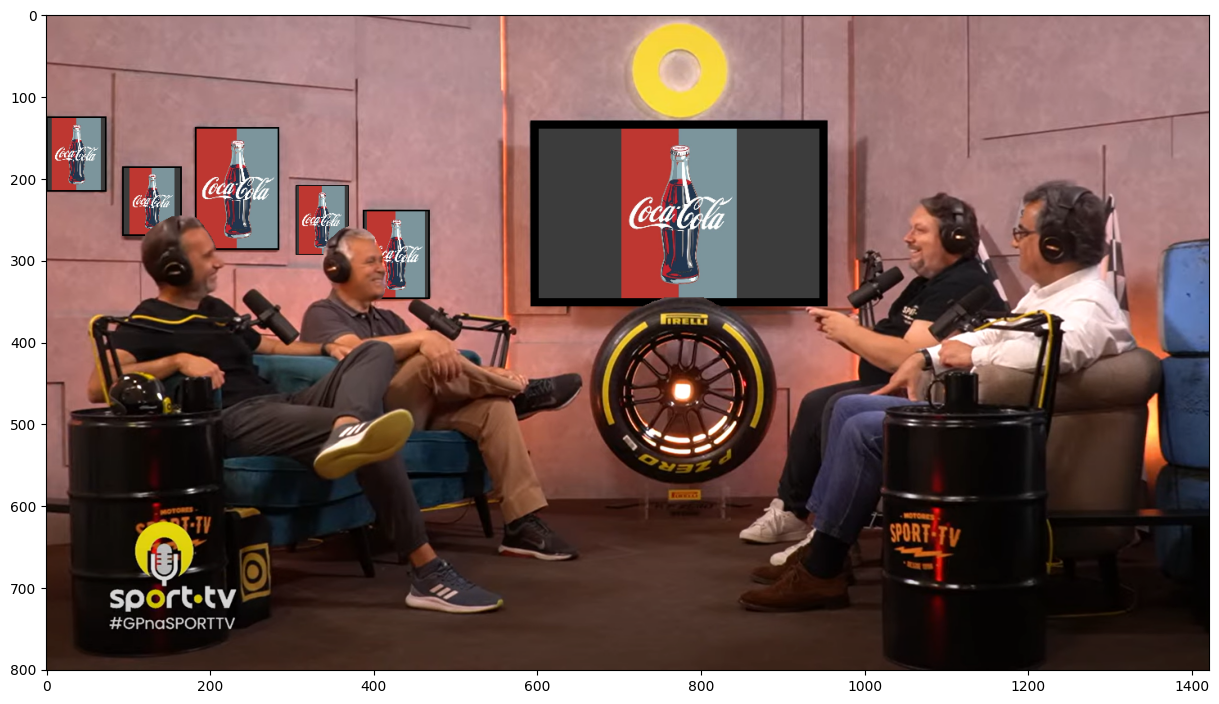

In [2]:
plt.figure(figsize=(15,15))

ad_gen = BRNDTS()

advert = next(load_image(ADVERT)) #load_image creates a generator, hence the need for the next() call

for image in load_image(SOURCE):
    cnt_list, warp_boxes = ad_gen.advert_locations(image) #Detection stage
    seg_occlusion_mask = ad_gen.segment_occlusions(image) #Occlusion removal stage
    final_image = ad_gen.gen_advert(advert, image, cnt_list, seg_occlusion_mask, warp_boxes, mode = 'total', color_correction = None, smoothing = None) #Advert insertion stage 
    
    plt.imshow(final_image)